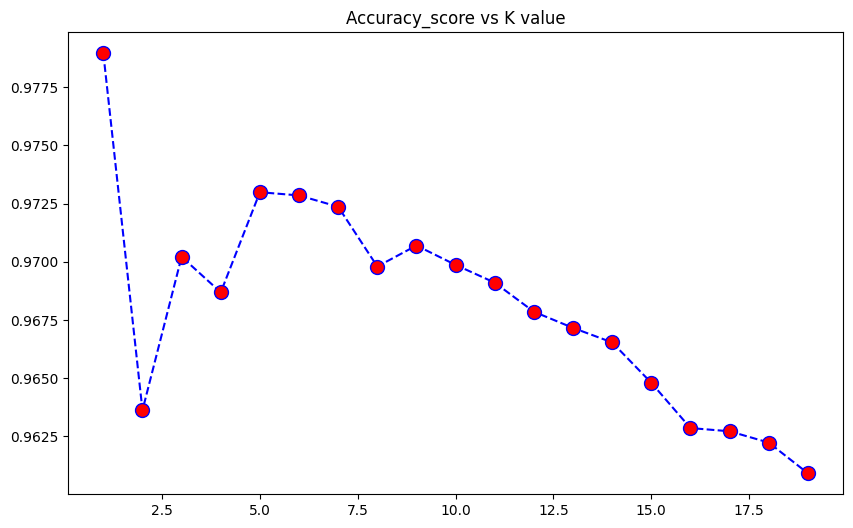

0.9851485148514851
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       101
           1       0.99      0.99      0.99       101
           2       0.90      0.99      0.94       101
           3       1.00      0.94      0.97       101
           4       1.00      0.99      1.00       101
           5       1.00      1.00      1.00       101
           6       0.97      0.99      0.98       101
           7       0.99      0.98      0.99       101
           8       0.99      1.00      1.00       101
           9       1.00      0.98      0.99       101
          10       1.00      0.99      1.00       101
          11       1.00      1.00      1.00       101
          12       1.00      0.98      0.99       101
          13       1.00      1.00      1.00       101
          14       0.97      0.94      0.95       101
          15       0.96      0.90      0.93       101
          16       1.00      1.00      1.00       101
        

<AxesSubplot:title={'center':'Confusion Matrix for K Nearest Neighbour'}>

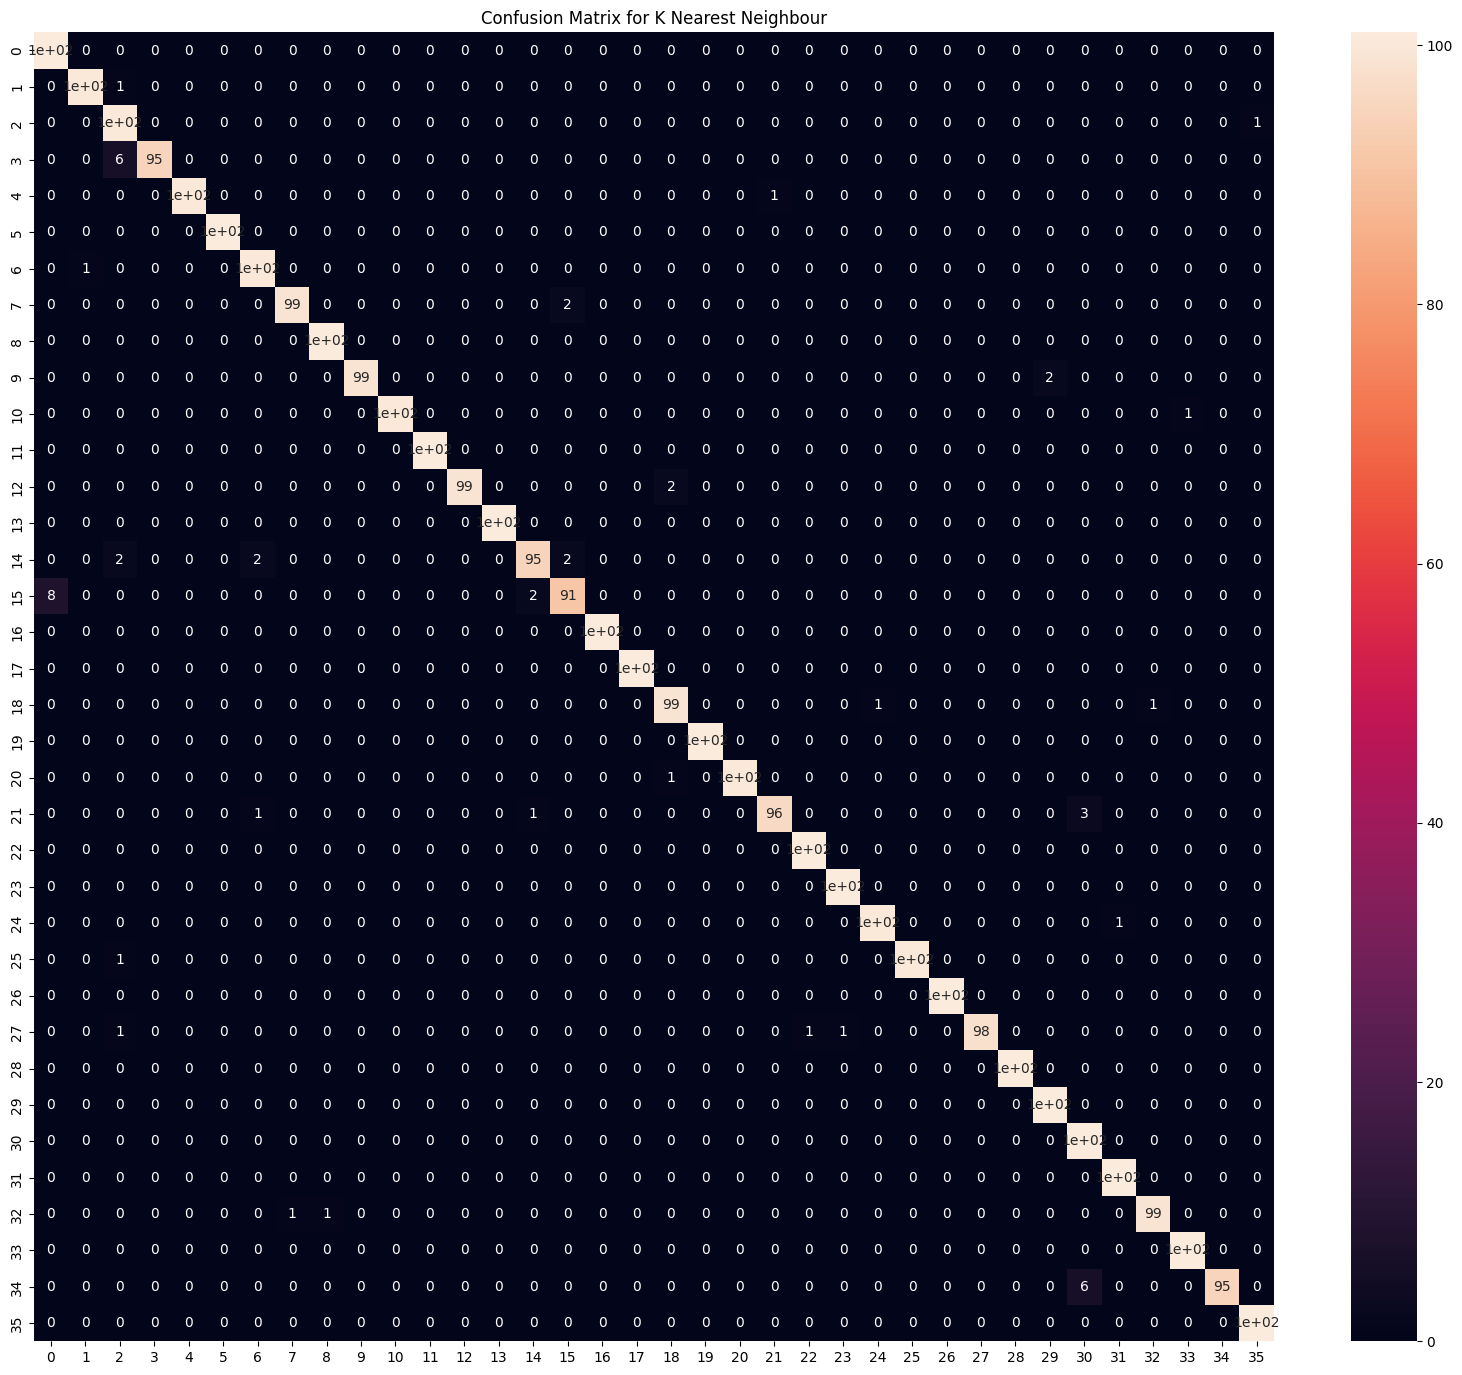

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sbn

data=pd.read_csv('C:/Users/Sandeep Roy/Desktop/data2/data/train.csv',low_memory=False)
data.head()

test=pd.read_csv('C:/Users/Sandeep Roy/Desktop/data2/data/test.csv',low_memory=False)
test.head()

x=data.iloc[:,0:180]
y=data.iloc[:,-1]

le=LabelEncoder()
y=le.fit_transform(y)

x_test=test.iloc[:,0:180]
y_test=test.iloc[:,-1]

y_test=le.fit_transform(y_test)

# Choosing a K value

accuracy_rate=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score.mean())

# Plotting accuracy with different values of k

plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Accuracy_score vs K value")
plt.show()

knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x,y)

y_pred=knn.predict(x_test)

print(accuracy_score(y_test,y_pred))

c_m=confusion_matrix(y_test,y_pred)

print(classification_report(y_test,y_pred))

plt.figure(figsize=(20,17))
plt.title("Confusion Matrix for K Nearest Neighbour")
df_cm=pd.DataFrame(c_m)
sbn.heatmap(df_cm,annot=True)